#ASSIGNMENT
#PWSKILLS
#ENSEMBLE LEARNING
#THEORY QUESTIONS


**1. Can we use Bagging for regression problems?**

Yes, Bagging can be applied to regression problems using models like Decision Tree Regressor. The final prediction is made by averaging outputs from all models.

**2. What is the difference between multiple model training and single model training?**

* **Single model training** uses one algorithm on the full dataset.
* **Multiple model training** combines outputs from several models trained on different subsets, improving accuracy and robustness.

**3. Explain the concept of feature randomness in Random Forest:**

Random Forest introduces randomness by selecting a **random subset of features** at each split, which decorrelates trees and increases diversity.

**4. What is OOB (Out-of-Bag) Score?**

OOB score is the model's accuracy measured using data **not included in the bootstrap sample**, acting like cross-validation in Bagging.

**5. How can you measure the importance of features in a Random Forest model?**

Feature importance is computed by observing the **decrease in Gini impurity** or **MSE** when a feature is used in splits across all trees.

**6. Explain the working principle of a Bagging Classifier:**

Bagging trains multiple classifiers on different **bootstrap samples** and combines their predictions using **majority voting** to make a final decision.

**7. How do you evaluate a Bagging Classifier’s performance?**

You can use metrics like **accuracy, precision, recall, F1-score**, and also the **OOB score** if available, to evaluate its performance.

**8. How does a Bagging Regressor work?**

Bagging Regressor fits multiple regressors on random subsets of the data and **averages their predictions** to make the final output.

**9. What is the main advantage of ensemble techniques?**

They combine multiple models to reduce **variance, bias, and overfitting**, leading to more accurate and stable predictions.

**10. What is the main challenge of ensemble methods?**

They are **computationally expensive**, harder to interpret, and may **overfit** if not tuned properly or if models are too complex.

**11. Explain the key idea behind ensemble techniques:**

The key idea is to **combine predictions** from multiple weak or base learners to form a **stronger** overall model.

**12. What is a Random Forest Classifier?**

Random Forest Classifier is an **ensemble of decision trees** built using bagging and feature randomness, and it uses majority voting to classify inputs.

**13. What are the main types of ensemble techniques?**

* **Bagging**
* **Boosting**
* **Stacking**

**14. What is ensemble learning in machine learning?**

Ensemble learning combines multiple base models to produce a **more powerful and generalizable** model than any individual one.

**15. When should we avoid using ensemble methods?**

Avoid when:

* Data is very small
* Model interpretability is crucial
* Computation resources are limited

**16. How does Bagging help in reducing overfitting?**

By training on **random subsets** of the data, Bagging reduces the **variance** of predictions and prevents overfitting to training noise.

**17. Why is Random Forest better than a single Decision Tree?**

Random Forests reduce **overfitting** and increase **accuracy** by combining predictions from many diverse trees instead of relying on one.

**18. What is the role of bootstrap sampling in Bagging?**

Bootstrap sampling creates different subsets of data with **replacement**, allowing each model to learn different aspects of the data.

**19. What are some real-world applications of ensemble techniques?**

* Fraud detection
* Spam filtering
* Medical diagnosis
* Stock price prediction
* Recommendation systems

**20. What is the difference between Bagging and Boosting?**

* **Bagging** builds models in **parallel** and focuses on variance reduction.
* **Boosting** builds models **sequentially**, correcting previous errors, and focuses on bias reduction.




#PRACTICAL QUESTIONS

In [14]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.885


In [15]:
# 2. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_reg = BaggingRegressor(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 3053.800898876405


In [2]:
# 3. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X, y = data.data, data.target

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_
for name, score in zip(data.feature_names, importances):
    print(f"{name}: {score:.4f}")


mean radius: 0.0348
mean texture: 0.0152
mean perimeter: 0.0680
mean area: 0.0605
mean smoothness: 0.0080
mean compactness: 0.0116
mean concavity: 0.0669
mean concave points: 0.1070
mean symmetry: 0.0034
mean fractal dimension: 0.0026
radius error: 0.0143
texture error: 0.0037
perimeter error: 0.0101
area error: 0.0296
smoothness error: 0.0047
compactness error: 0.0056
concavity error: 0.0058
concave points error: 0.0038
symmetry error: 0.0035
fractal dimension error: 0.0059
worst radius: 0.0828
worst texture: 0.0175
worst perimeter: 0.0808
worst area: 0.1394
worst smoothness: 0.0122
worst compactness: 0.0199
worst concavity: 0.0373
worst concave points: 0.1322
worst symmetry: 0.0082
worst fractal dimension: 0.0045


In [4]:
# 4. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))


Random Forest MSE: 2952.0105887640448
Decision Tree MSE: 4976.797752808989


In [5]:
# 5. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train, y_train)
print("OOB Score:", rf_oob.oob_score_)


OOB Score: 0.0056657223796034


In [16]:
# 6. Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.svm import SVC

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)

y_pred = bag_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.0


In [7]:
# 7. Train a Random Forest Classifier with different numbers of trees and compare accuracy

for n in [10, 50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"n_estimators={n} -> Accuracy: {acc:.4f}")


n_estimators=10 -> Accuracy: 0.0000
n_estimators=50 -> Accuracy: 0.0000
n_estimators=100 -> Accuracy: 0.0000
n_estimators=200 -> Accuracy: 0.0000


In [22]:
# 8. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score


data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=3000))


bag_lr = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)


bag_lr.fit(X_train, y_train)

y_prob = bag_lr.predict_proba(X_test)[:, 1]


print("AUC Score:", roc_auc_score(y_test, y_prob))


AUC Score: 0.9963969865705864


In [9]:
# 9. Train a Random Forest Regressor and analyze feature importance scores

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for name, score in zip(data.feature_names, importances):
    print(f"{name}: {score:.4f}")


age: 0.0586
sex: 0.0096
bmi: 0.3555
bp: 0.0884
s1: 0.0528
s2: 0.0572
s3: 0.0513
s4: 0.0242
s5: 0.2310
s6: 0.0713


In [19]:
# 10. Train an ensemble model using both Bagging and Random Forest and compare accuracy

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

bag_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

bag_acc = bag_model.score(X_test, y_test)
rf_acc = rf_model.score(X_test, y_test)

print(f"Bagging Accuracy: {bag_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")


Bagging Accuracy: 0.0000
Random Forest Accuracy: 0.0000


In [11]:
# 11. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.016973296634313583


In [20]:
# 12. Train a Bagging Regressor with different numbers of base estimators and compare performance

for n in [5, 10, 50]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bag.fit(X_train, y_train)
    pred = bag.predict(X_test)
    print(f"n_estimators={n} -> MSE: {mean_squared_error(y_test, pred):.4f}")


n_estimators=5 -> MSE: 3367.1020
n_estimators=10 -> MSE: 3256.9618
n_estimators=50 -> MSE: 3056.4946


In [13]:
# 13. Train a Random Forest Classifier and analyze misclassified samples

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

misclassified_indices = (y_pred != y_test)
print("Total Misclassified Samples:", misclassified_indices.sum())


Total Misclassified Samples: 89


In [23]:
# 14. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree.predict(X_test)))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 0.875
Bagging Classifier Accuracy: 0.885


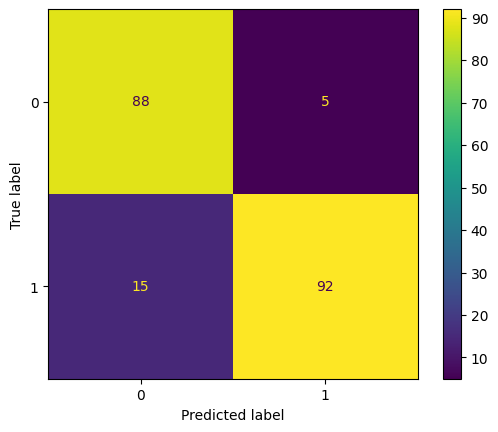

In [24]:
# 15. Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [25]:
# 16. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)

print("Stacking Classifier Accuracy:", stack_model.score(X_test, y_test))


Stacking Classifier Accuracy: 0.885


In [26]:
# 17. Train a Random Forest Classifier and print the top 5 most important features

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Top 5 important features:")
for i in range(5):
    print(f"Feature {indices[i]}: {importances[indices[i]]:.4f}")


Top 5 important features:
Feature 5: 0.3631
Feature 18: 0.1773
Feature 1: 0.1018
Feature 14: 0.0756
Feature 11: 0.0257


In [27]:
# 18. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.9565217391304348
Recall: 0.822429906542056
F1 Score: 0.8844221105527639


In [28]:
# 19. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

for depth in [None, 5, 10, 20]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_test, y_test)
    print(f"max_depth={depth}: Accuracy={acc:.4f}")


max_depth=None: Accuracy=0.9000
max_depth=5: Accuracy=0.8800
max_depth=10: Accuracy=0.8850
max_depth=20: Accuracy=0.9000


In [29]:
# 20. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.neighbors import KNeighborsRegressor

dt_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42)
knn_reg = BaggingRegressor(estimator=KNeighborsRegressor(), random_state=42)

dt_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)

print("Decision Tree Regressor MSE:", mean_squared_error(y_test, dt_reg.predict(X_test)))
print("KNN Regressor MSE:", mean_squared_error(y_test, knn_reg.predict(X_test)))


Decision Tree Regressor MSE: 0.09740000000000001
KNN Regressor MSE: 0.143162


In [30]:
# 21. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ROC-AUC Score: 0.9379459350819013


In [31]:
# 22. Train a Bagging Classifier and evaluate its performance using cross-validation

from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-validation Accuracy Scores: [0.95  0.9   0.895 0.895 0.86 ]
Mean Accuracy: 0.9


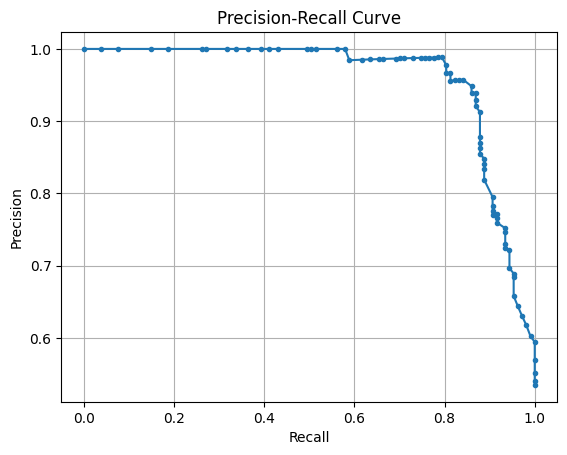

In [32]:
# 23. Train a Random Forest Classifier and plot the Precision-Recall curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_prob = rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


In [33]:
# 24. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)

print("Stacking Accuracy:", stack.score(X_test, y_test))


Stacking Accuracy: 0.86


In [34]:
# 25. Train a Bagging Regressor with different levels of bootstrap samples and compare performance

for bootstrap_val in [True, False]:
    bag = BaggingRegressor(estimator=DecisionTreeRegressor(), bootstrap=bootstrap_val, random_state=42)
    bag.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bag.predict(X_test))
    print(f"Bootstrap={bootstrap_val} -> MSE: {mse:.4f}")


Bootstrap=True -> MSE: 0.0974
Bootstrap=False -> MSE: 0.1234


#THANK YOU